In [1]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [ ]:
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 600

In [2]:
DATASET_PATH = '../datasets/segmentation-evaluation-database/1obj'

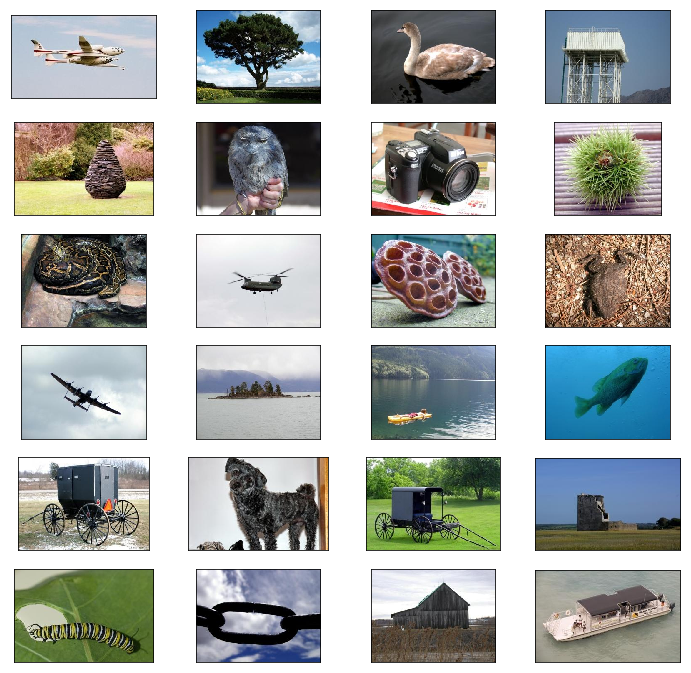

In [3]:
src_color_image_paths = glob.glob(DATASET_PATH + '/*/src_color/*.png')
images = list(filter(lambda X: X.shape[0] < X.shape[1], map(mpimg.imread, src_color_image_paths)))

fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(12, 12))

for ax, img in zip(axes.flat, images):
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

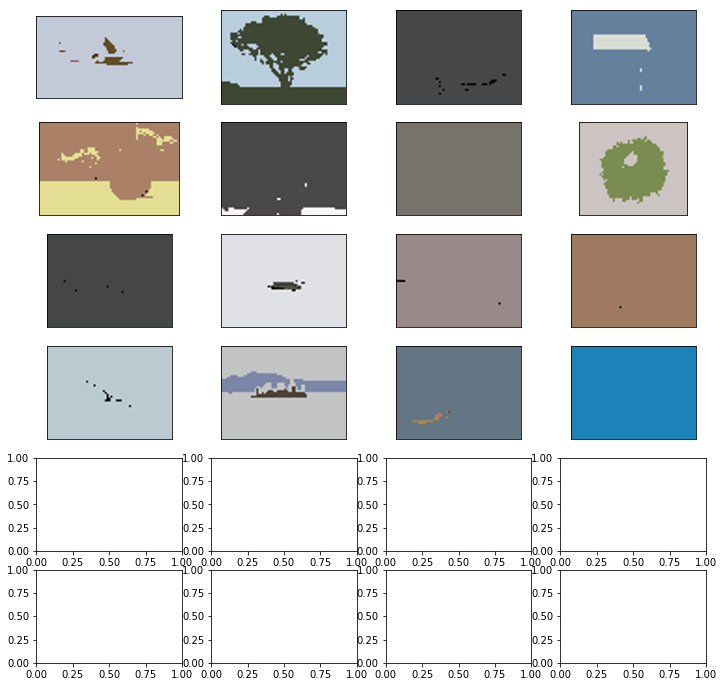

In [4]:
algo_seg_image_paths = glob.glob(DATASET_PATH + '/*/algo_seg/*.png')
images = list(filter(lambda X: X.shape[0] < X.shape[1], map(mpimg.imread, algo_seg_image_paths[:6*4])))

fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(12, 12))

for ax, img in zip(axes.flat, images):
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

In [5]:
img = images[0]

d = dict()
for x in [img[i, j] for i in range(img.shape[0]) for j in range(img.shape[1])][:1]:
    d[f"{x}"] = 1
d

{'[0.7607843  0.7921569  0.84313726]': 1}

In [6]:
mask = img == img[0,0]
np.where(~mask)

(array([ 578,  578,  578, ..., 1571, 1571, 1571], dtype=int64),
 array([2047, 2048, 2049, ..., 2850, 2851, 2852], dtype=int64),
 array([2, 2, 2, ..., 2, 2, 2], dtype=int64))

In [11]:
np.unique(img.reshape(-1, 3), axis=0)

array([[0.20392157, 0.10196079, 0.        ],
       [0.20392157, 0.10196079, 0.00392157],
       [0.20392157, 0.10196079, 0.00784314],
       ...,
       [0.81960785, 0.8666667 , 0.9411765 ],
       [0.81960785, 0.8666667 , 0.94509804],
       [0.81960785, 0.8666667 , 0.9490196 ]], dtype=float32)

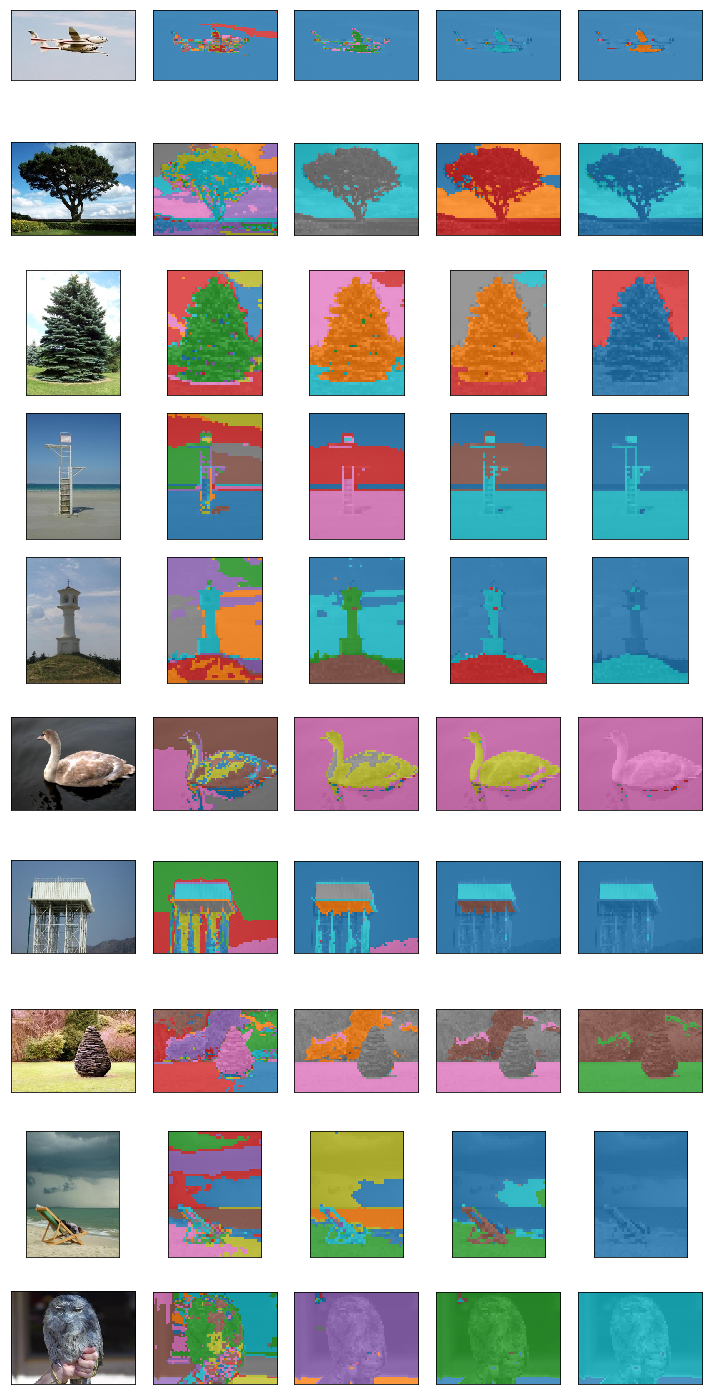

In [149]:
import re
from collections import defaultdict

segmentations = [
    re.match(r".*\\(.*)-h=(.*)-K=(.*)\.png", path).group(0, 1, 2, 3)
    for path in glob.glob(DATASET_PATH + '/*/algo_seg/*-h=*-K=gaussian.png')
    if not re.match(".*-T.png", path)
]

d = defaultdict(list)
for (path, name, h, K) in segmentations:
    d[name.lower()].append((path, float(h), K))

col_map = dict([(0.2, 1), (0.4, 2), (0.6, 3), (0.8, 4)])
k = len(col_map)
n = 10
fig, axes = plt.subplots(ncols=k + 1, nrows=n, figsize=((k + 1) * 2, n * 2))

for axes_row, (name, segmentations) in zip(axes, d.items()):
    src_bw = Image.open(f"{DATASET_PATH}/{name}/src_bw/{name}.png")
    src_color = Image.open(f"{DATASET_PATH}/{name}/src_color/{name}.png")
    axes_row[0].imshow(src_color)
    
    for (path, h, K) in segmentations:
        if h in col_map:
            img = mpimg.imread(path)
            ax = axes_row[col_map[h]]
            ax.imshow(src_bw.resize((img.shape[1], img.shape[0])))
            ax.imshow(img, cmap='tab10', alpha=0.8)
        
    for ax in axes_row:
        ax.set_xticks([])
        ax.set_yticks([])


fig.tight_layout()
plt.show()


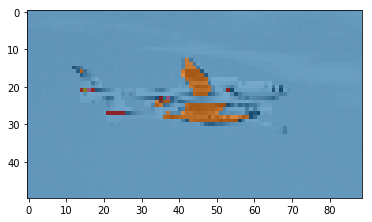

In [131]:
from PIL import Image

fig, ax = plt.subplots()

name = list(d)[0]

# mpimg.imread
img_source = Image.open(f"{DATASET_PATH}/{name}/src_bw/{name}.png")
#img = Image.open(f"{DATASET_PATH}/{name}/algo_seg/{name}-h=0.8-K=gaussian.png")
#img = img.resize(img_source.size, Image.NEAREST)
img = mpimg.imread(f"{DATASET_PATH}/{name}/algo_seg/{name}-h=0.8-K=gaussian.png")

ax.imshow(img_source.resize((img.shape[1], img.shape[0])))
ax.imshow(img, cmap='tab10', alpha=0.6)
plt.show()

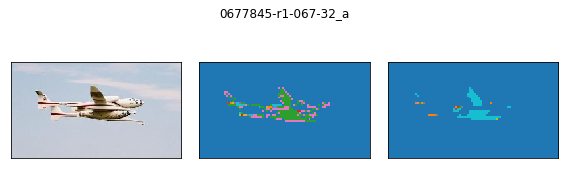

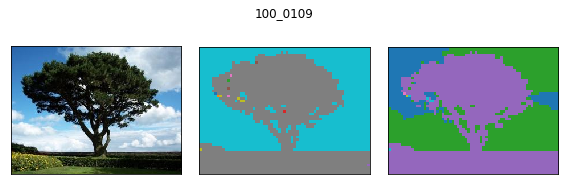

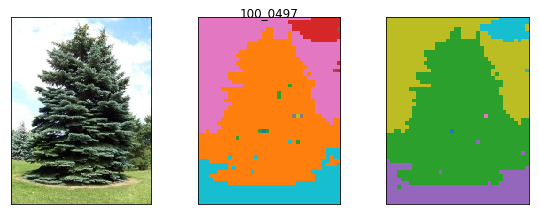

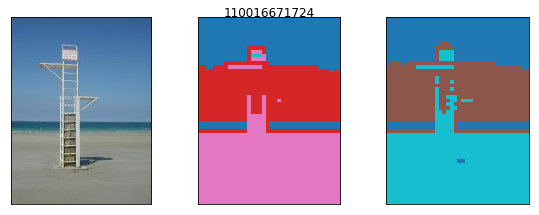

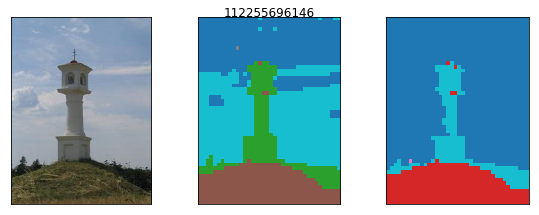

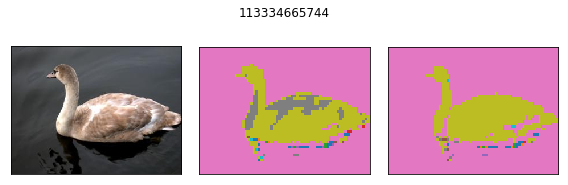

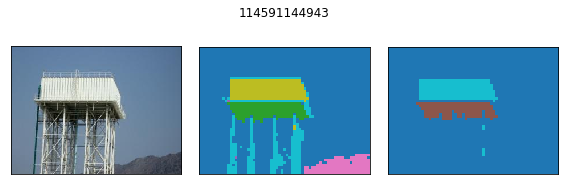

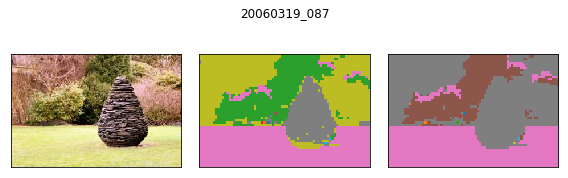

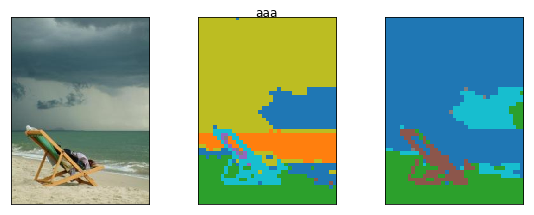

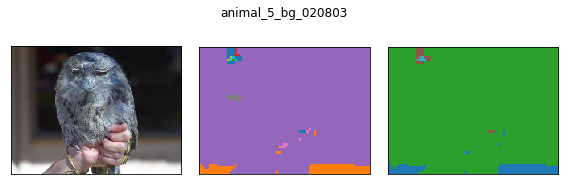

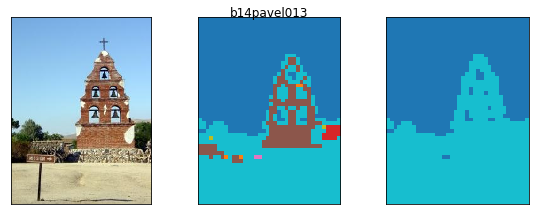

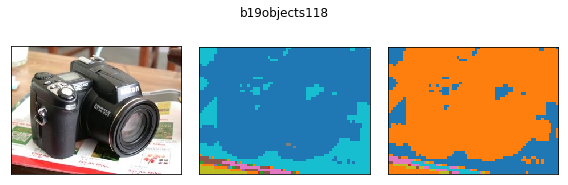

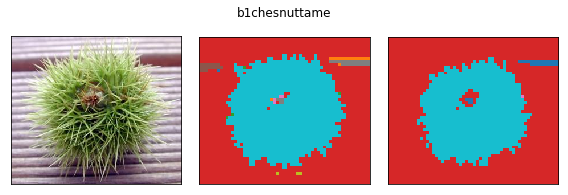

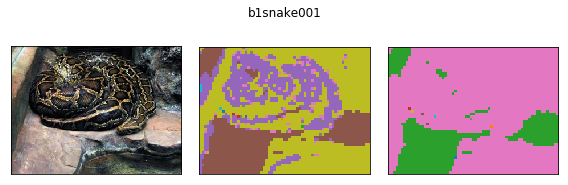

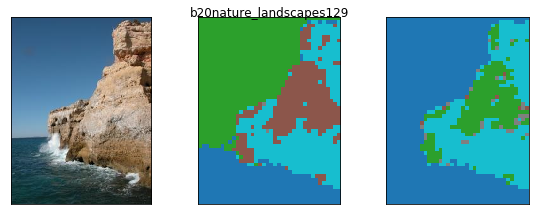

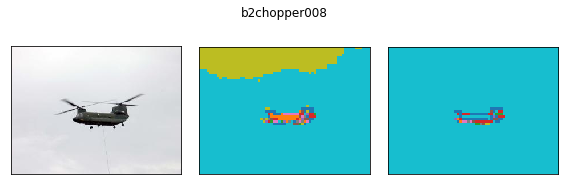

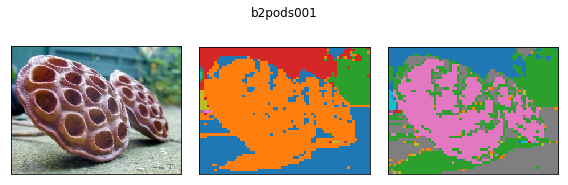

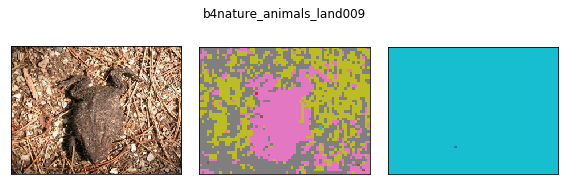

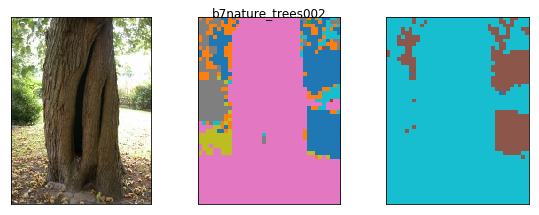

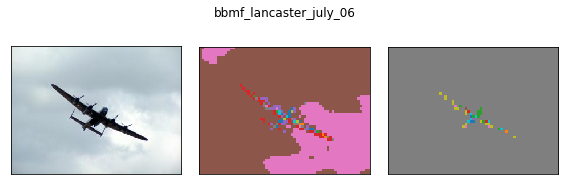

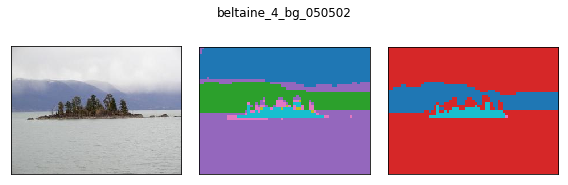

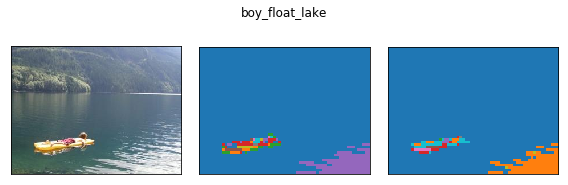

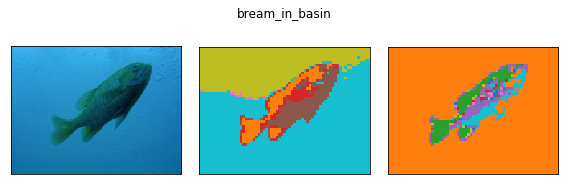

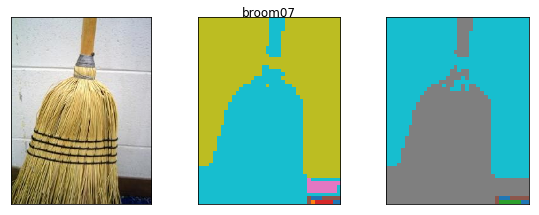

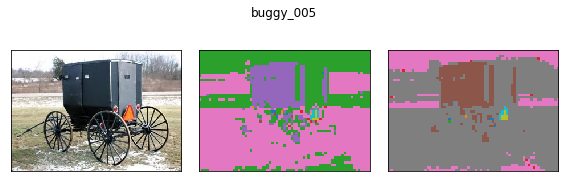

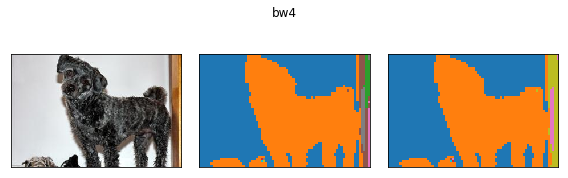

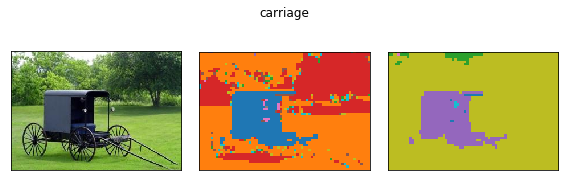

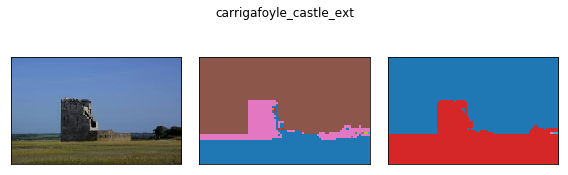

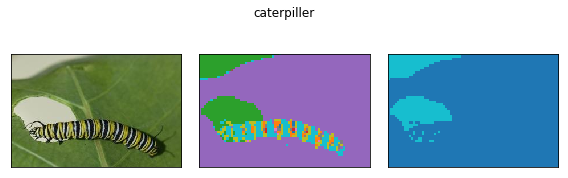

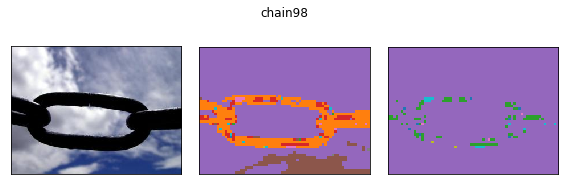

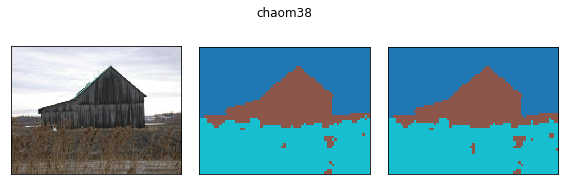

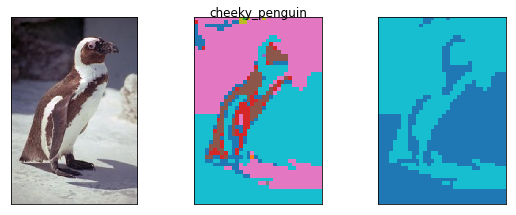

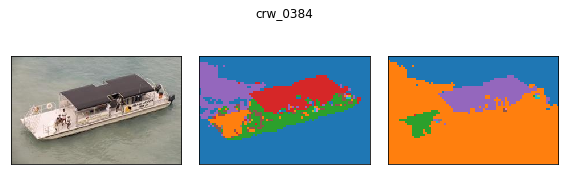

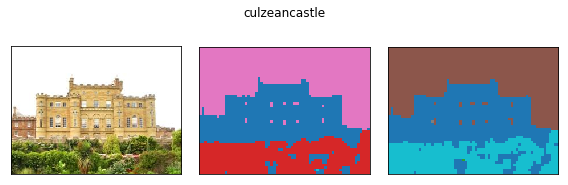

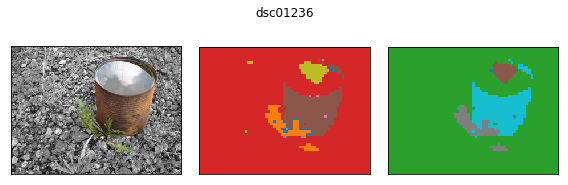

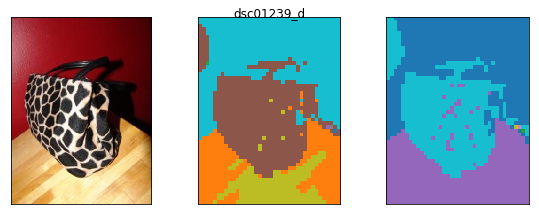

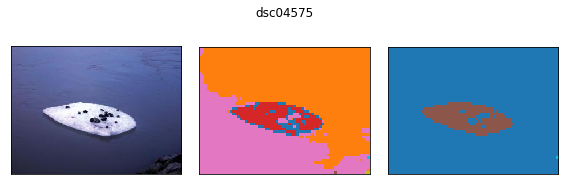

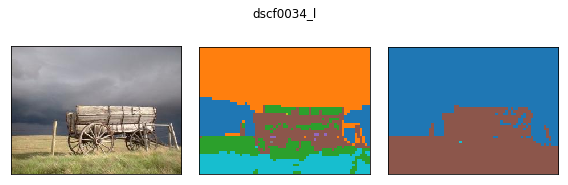

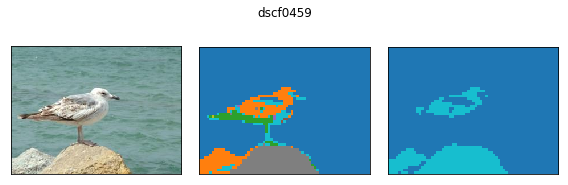

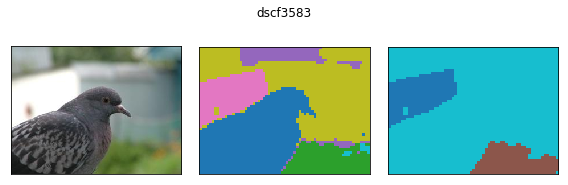

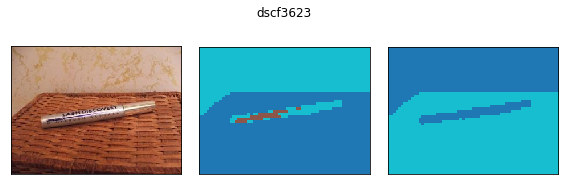

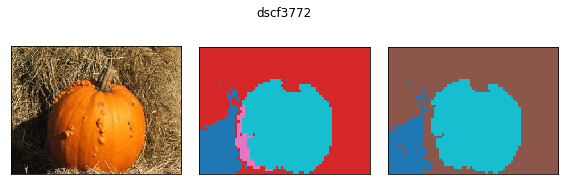

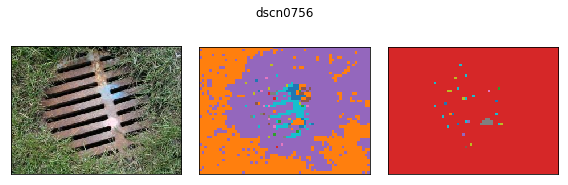

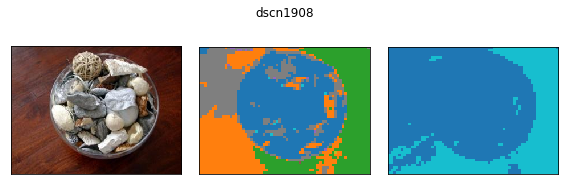

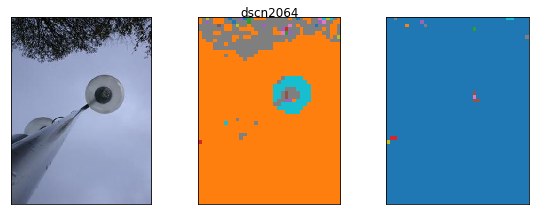

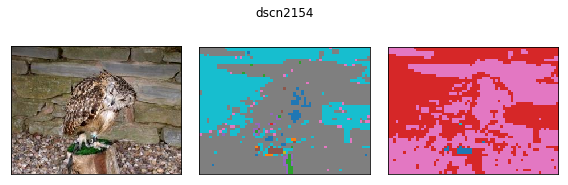

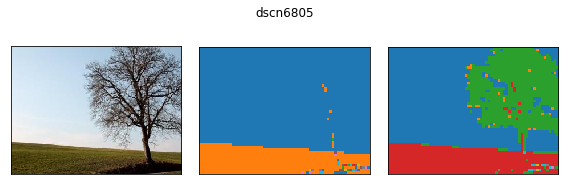

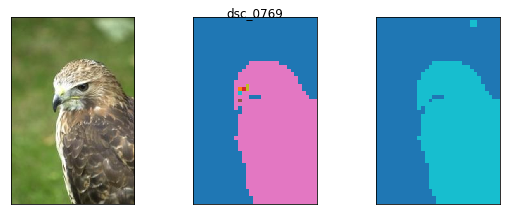

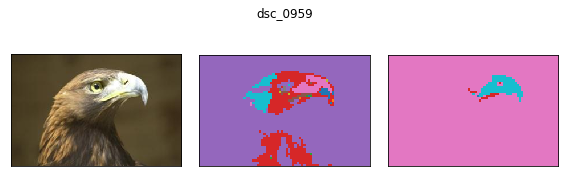

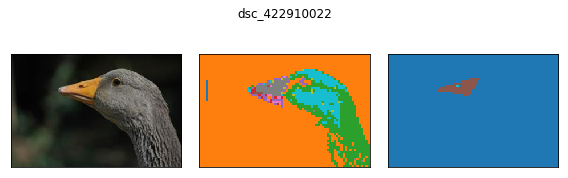

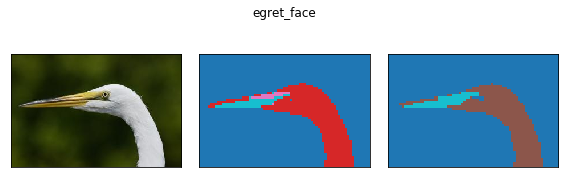

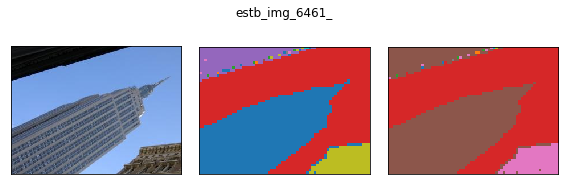

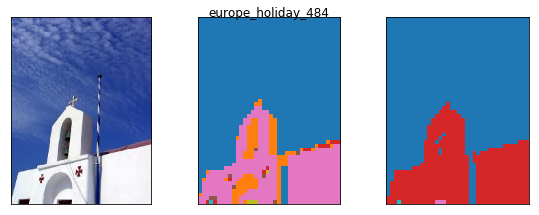

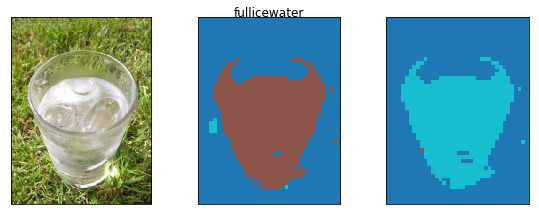

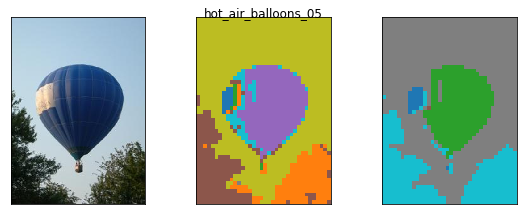

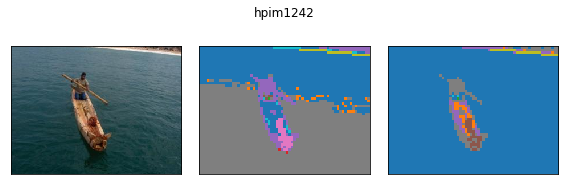

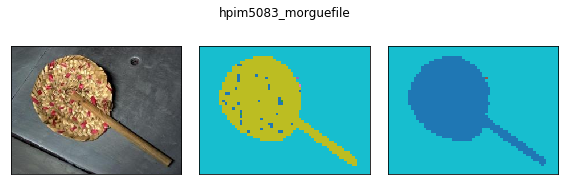

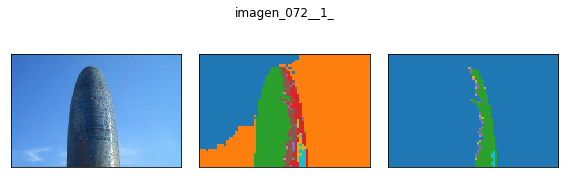

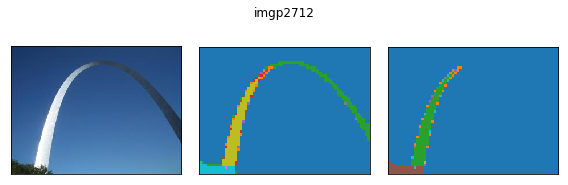

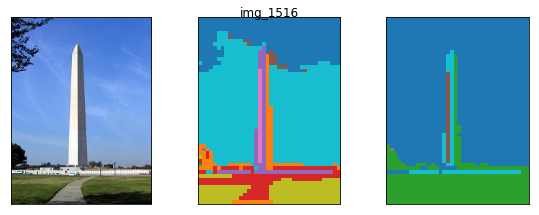

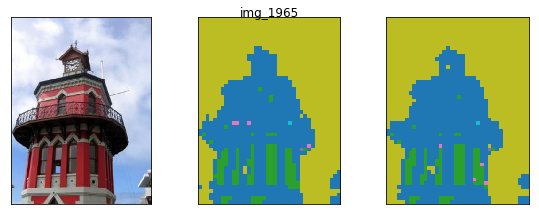

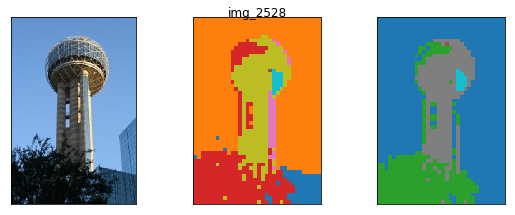

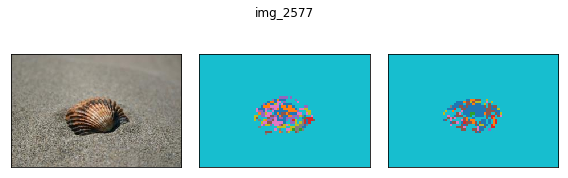

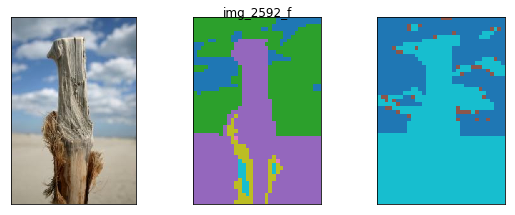

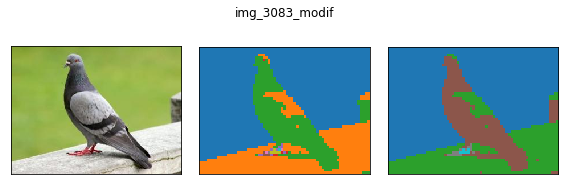

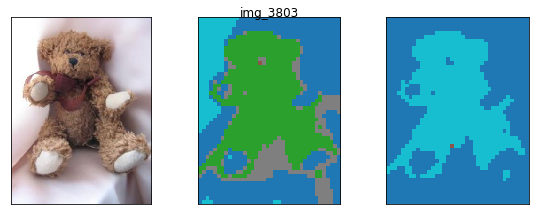

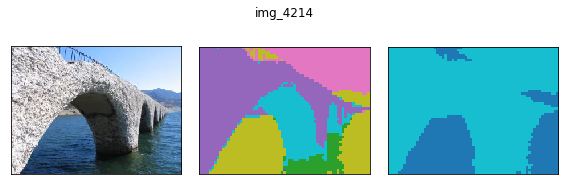

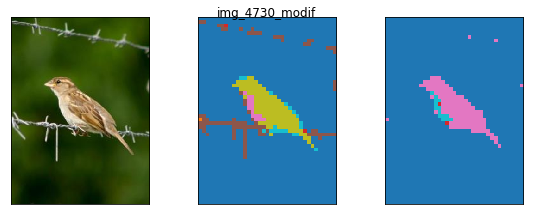

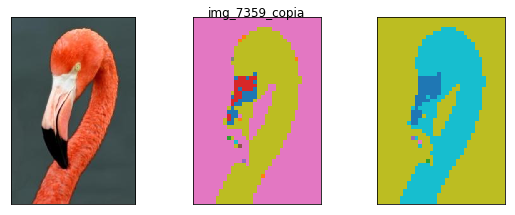

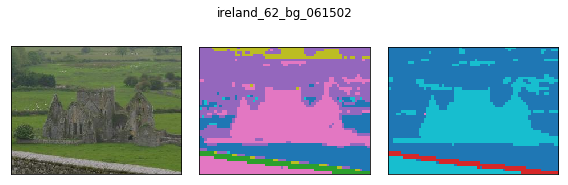

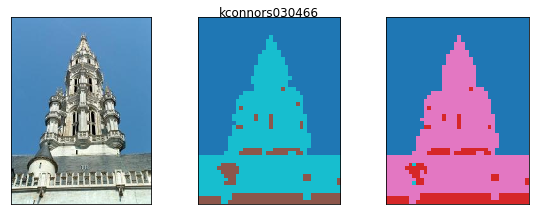

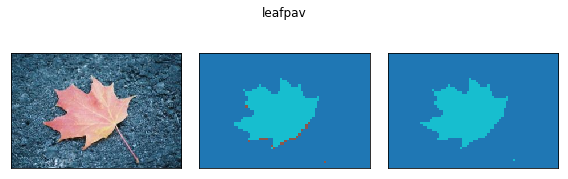

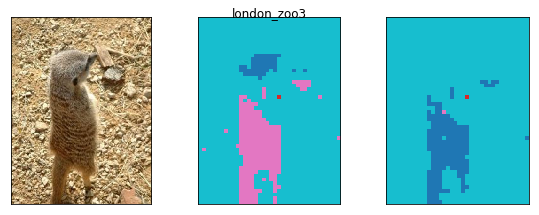

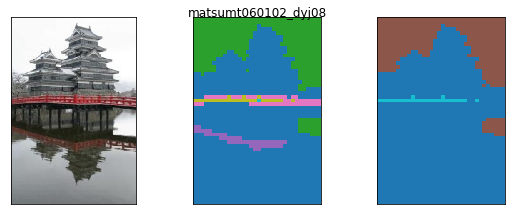

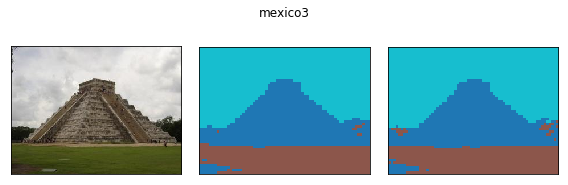

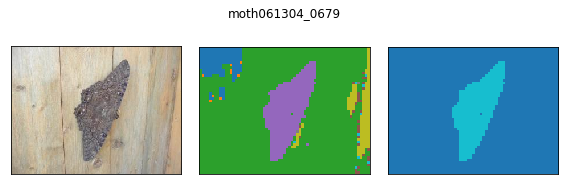

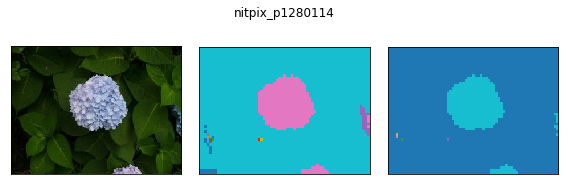

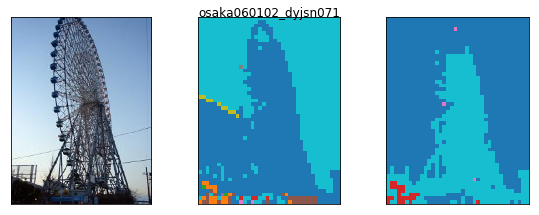

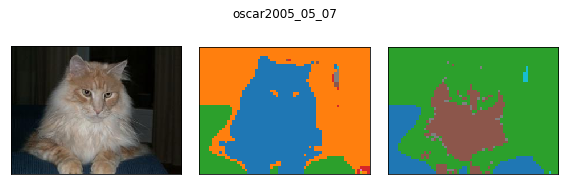

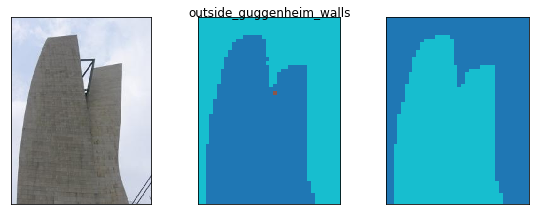

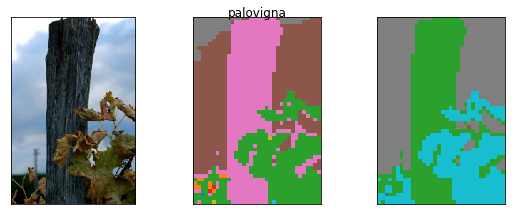

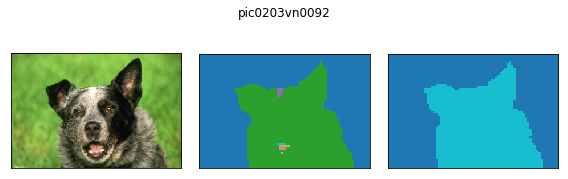

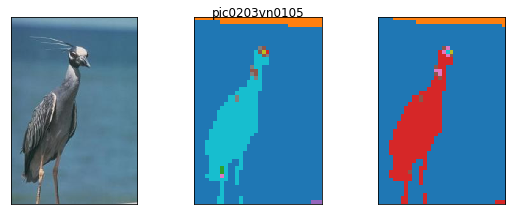

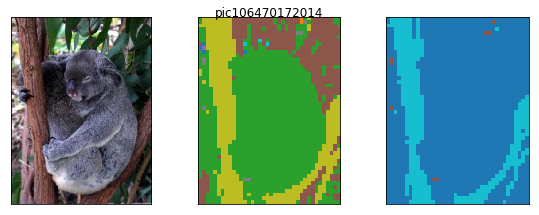

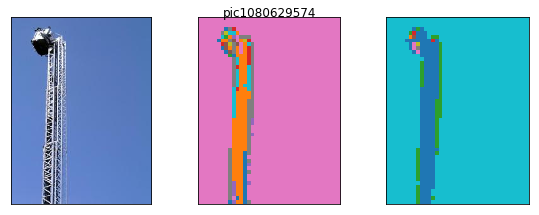

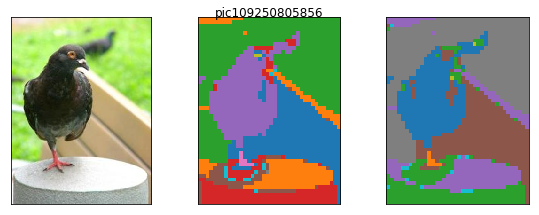

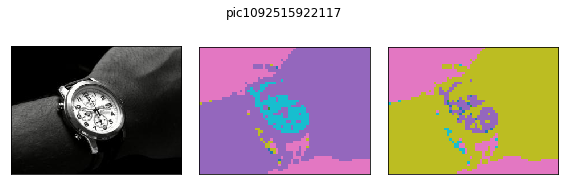

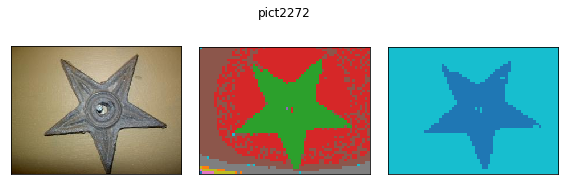

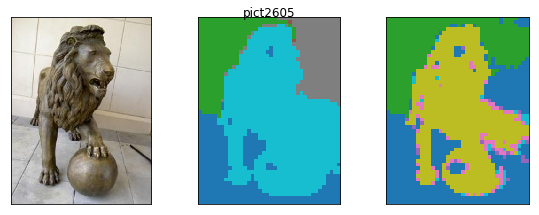

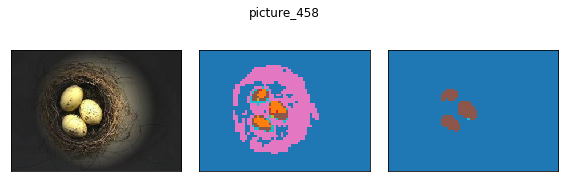

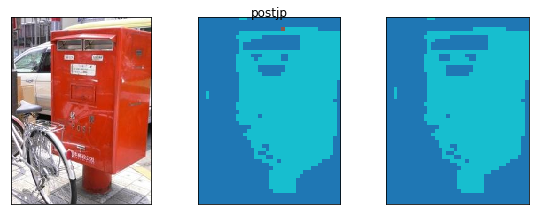

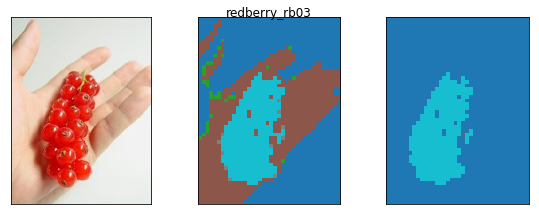

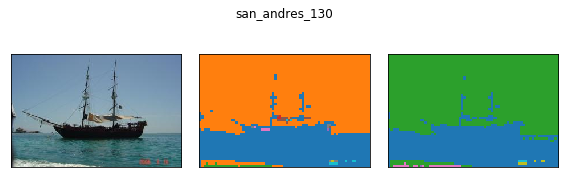

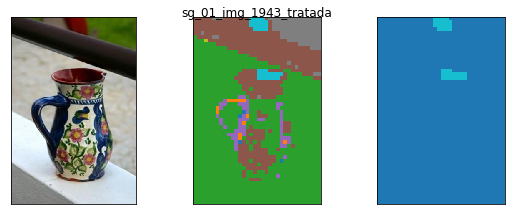

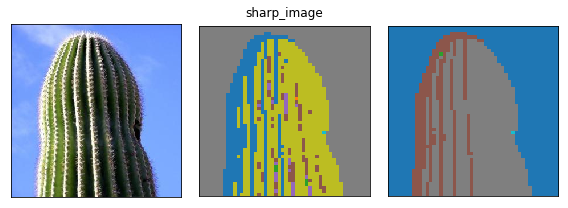

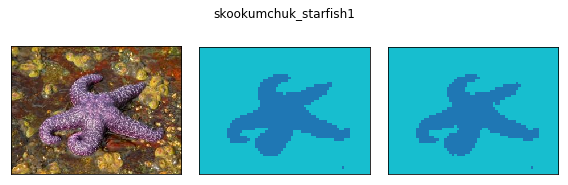

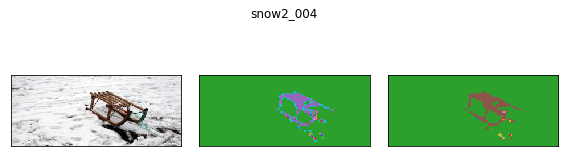

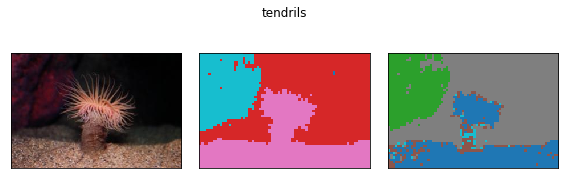

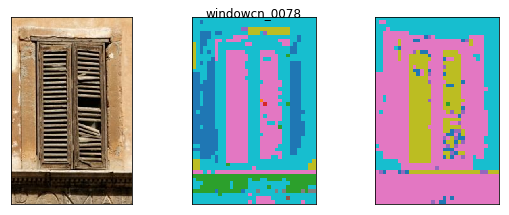

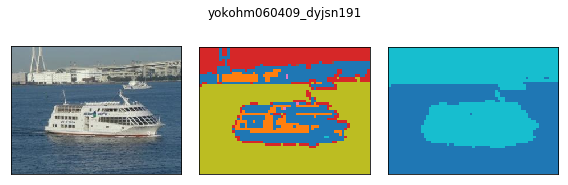

In [154]:
names = [
    re.match(r".*\\(.*).png", path).group(1)
    for path in glob.glob(f"{DATASET_PATH}/*/src_color/*.png")
]
for name in names:
    fig, axes = plt.subplots(ncols=3, figsize=(8, 3))
    axes[0].imshow(Image.open(f"{DATASET_PATH}/{name}/src_color/{name}.png"))
    axes[1].imshow(np.array(Image.open(f"{DATASET_PATH}/{name}/algo_seg/{name}-h=0.4-K=gaussian.png")), cmap='tab10')
    axes[2].imshow(np.array(Image.open(f"{DATASET_PATH}/{name}/algo_seg/{name}-h=0.6-K=gaussian.png")), cmap='tab10')
    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
    
    fig.suptitle(name)
    fig.tight_layout()
    plt.show()